In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
dokumen = files.upload()

Saving DenseNet-BC-121-32-no-top.h5 to DenseNet-BC-121-32-no-top.h5


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                   title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                              Netflix TV Shows and Movies                        2MB  2022-05-15 00:01:23           4496        149  1.0              
muratkokludataset/date-fruit-datasets                                 Date Fruit Datasets                              408KB  2022-04-03 09:25:39          12063       1518  0.9375           
paradisejoy/top-hits-spotify-from-20002019                            Top Hits Spotify from 2000-2019                   94KB  2022-05-31 07:20:57           3972        104  1.0              
muratkokludataset/rice-image-dataset         

In [ ]:
! kaggle datasets download -d mariaherrerot/aptos2019

100% 7.99G/8.01G [01:03<00:00, 138MB/s]
100% 8.01G/8.01G [01:03<00:00, 136MB/s]


In [ ]:
! kaggle datasets download -d tanlikesmath/diabetic-retinopathy-resized

100% 7.24G/7.25G [02:13<00:00, 94.0MB/s]
100% 7.25G/7.25G [02:13<00:00, 58.3MB/s]


In [ ]:
import zipfile
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import csv
import shutil
import matplotlib.image as mpimg
import cv2
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tqdm import tqdm
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from keras.models import load_model
from keras.preprocessing import image
from google.colab import files
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16 
from sklearn.utils import class_weight, shuffle
from PIL import Image
from sklearn.metrics import cohen_kappa_score, accuracy_score
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.utils import to_categorical

In [ ]:
! pip show tensorflow
! pip show numpy
! pip show pandas
! pip show Pillow
! pip show seaborn
! pip show cv2
! pip show matplotlib

Name: tensorflow
Version: 2.8.2+zzzcolab20220527125636
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: libclang, numpy, wrapt, gast, google-pasta, tensorflow-estimator, typing-extensions, termcolor, grpcio, protobuf, astunparse, setuptools, keras, flatbuffers, six, tensorflow-io-gcs-filesystem, absl-py, keras-preprocessing, opt-einsum, h5py, tensorboard
Required-by: kapre
Name: numpy
Version: 1.21.6
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: yellowbrick, xgboost, xarray, xarray-einstats, wordcloud, torchvision, torchtext, tifffile, thinc, Theano-PyMC, tensorflow, tensorflow-probabil

In [ ]:
data = '{}/aptos2019.zip'.format(os.getcwd())
file_ekstrak = zipfile.ZipFile(data, 'r')
file_ekstrak.extractall()
file_ekstrak.close()

In [ ]:
data = '{}/diabetic-retinopathy-resized.zip'.format(os.getcwd())
file_ekstrak = zipfile.ZipFile(data, 'r')
file_ekstrak.extractall()
file_ekstrak.close()

In [ ]:
direktori_train = '/content/train_images/train_images'
direktori_val = '/content/val_images/val_images'
direktori_test = '/content/test_images/test_images'
#direktori_dataset_2 = '/content/resized_train/resized_train'

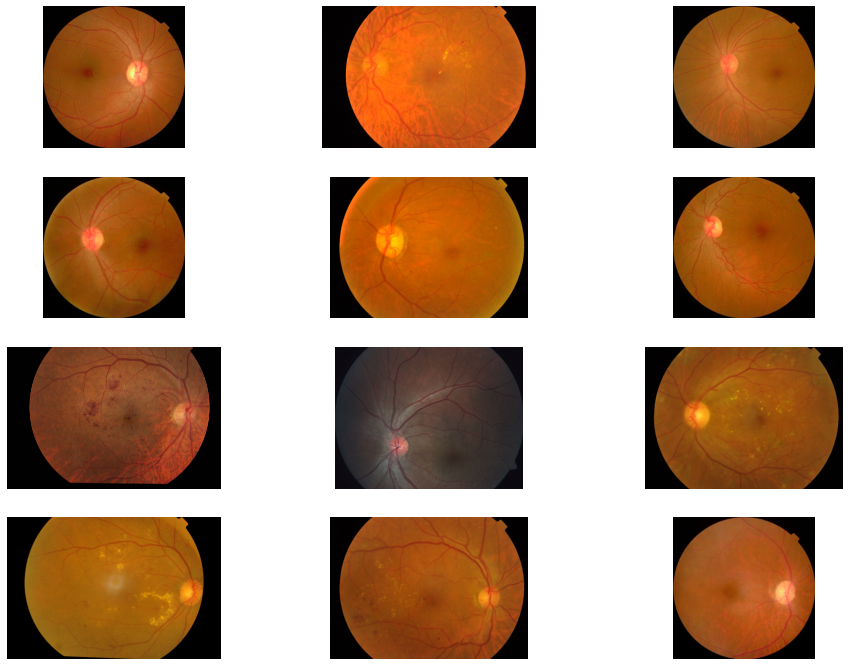

In [ ]:
# Gambar yang ada pada data_train
kolom = 4
baris = 3
fig = plt.gcf()
fig.set_size_inches(kolom*4, baris*4)
next_pic = 0
next_pic += 4
next_train = [os.path.join(direktori_train, gambar) for gambar in os.listdir(direktori_train)[next_pic-4:next_pic]]
next_val = [os.path.join(direktori_val, gambar) for gambar in os.listdir(direktori_val)[next_pic-4:next_pic]]
next_test = [os.path.join(direktori_test, gambar) for gambar in os.listdir(direktori_test)[next_pic-4:next_pic]]
for i, image_path in enumerate(next_train+next_val+next_test):
  size = plt.subplot(kolom, baris, i+1)
  size.axis('off')
  img = mpimg.imread(image_path)
  plt.imshow(img)
plt.show()

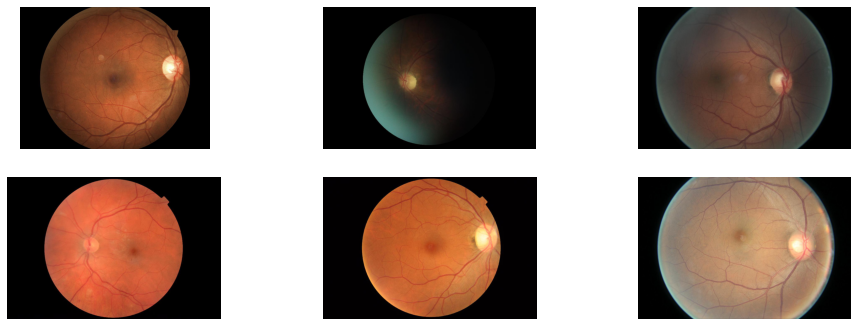

In [ ]:
# Gambar yang ada di dataset ke-2
# Gambar yang ada pada data_train
kolom = 4
baris = 3
fig = plt.gcf()
fig.set_size_inches(kolom*4, baris*4)
next_pic = 0
next_pic += 6
next_train = [os.path.join(direktori_dataset_2, gambar) for gambar in os.listdir(direktori_dataset_2)[next_pic-6:next_pic]]
for i, image_path in enumerate(next_train):
  size = plt.subplot(kolom, baris, i+1)
  size.axis('off')
  img = mpimg.imread(image_path)
  plt.imshow(img)
plt.show()

In [ ]:
os.mkdir('/content/Ben_Graham', 0o666)

In [ ]:
os.mkdir('/content/Ben_Graham_2', 0o666)

In [ ]:
# Preprocess Data_Train
for x in os.listdir('/content/train_images/train_images'):
  save_path = '{}/Ben_Graham/Train/{}'.format(os.getcwd(), x)
  image = cv2.imread('/content/train_images/train_images/{}'.format(x))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image, (426, 426))
  gaussian = cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , 426/10) ,-4 ,128)
  cv2.imwrite(save_path, gaussian)
# Preprocess Data_Val
for x in os.listdir('/content/val_images/val_images'):
  save_path = '{}/Ben_Graham/Valid/{}'.format(os.getcwd(), x)
  image = cv2.imread('/content/val_images/val_images/{}'.format(x))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image, (426, 426))
  gaussian = cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , 426/10) ,-4 ,128)
  cv2.imwrite(save_path, gaussian)
# Preprocess Data Test
for x in os.listdir('/content/test_images/test_images'):
  save_path = '{}/Ben_Graham/Test/{}'.format(os.getcwd(), x)
  image = cv2.imread('/content/test_images/test_images/{}'.format(x))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image, (426, 426))
  gaussian = cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , 426/10) ,-4 ,128)
  cv2.imwrite(save_path, gaussian)

In [ ]:
#Preprocess dataset 2
for x in os.listdir('/content/resized_train/resized_train'):
  save_path = '{}/Ben_Graham_2/{}'.format(os.getcwd(), x)
  image = cv2.imread('/content/resized_train/resized_train/{}'.format(x))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image, (426, 426))
  gaussian = cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , 426/10) ,-4 ,128)
  cv2.imwrite(save_path, gaussian)

In [ ]:
direktori_train_ben = '/content/Ben_Graham/Train'
direktori_valid_ben = '/content/Ben_Graham/Valid'
direktori_test_ben = '/content/Ben_Graham/Test'
#direktori_dataset_ben_2 = '/content/Ben_Graham_2'
#print(len(os.listdir(direktori_dataset_ben_2)))

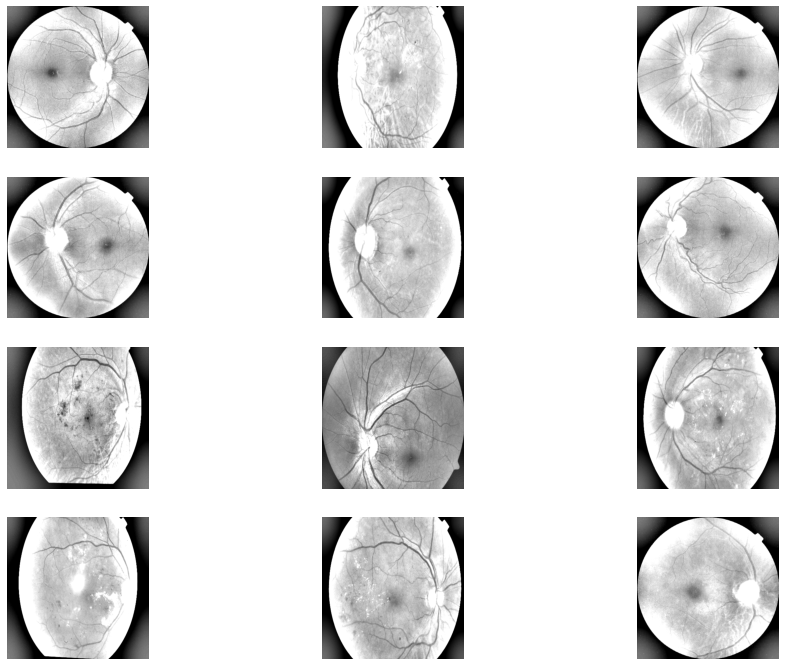

In [ ]:
# Gambar setelah preprocess
kolom = 4
baris = 3
fig = plt.gcf()
fig.set_size_inches(kolom*4, baris*4)
next_pic = 0
next_pic += 4
next_train = [os.path.join(direktori_train_ben, gambar) for gambar in os.listdir(direktori_train_ben)[next_pic-4:next_pic]]
next_val = [os.path.join(direktori_valid_ben, gambar) for gambar in os.listdir(direktori_valid_ben)[next_pic-4:next_pic]]
next_test = [os.path.join(direktori_test_ben, gambar) for gambar in os.listdir(direktori_test_ben)[next_pic-4:next_pic]]
for i, image_path in enumerate(next_train+next_val+next_test):
  size = plt.subplot(kolom, baris, i+1)
  size.axis('off')
  img = mpimg.imread(image_path)
  plt.imshow(img, cmap='gray')
plt.show()

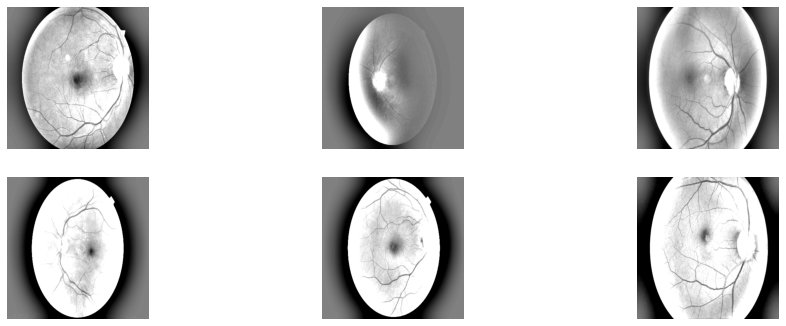

In [ ]:
# Gambar yang ada di dataset ke-2
# Gambar yang ada pada data_train
kolom = 4
baris = 3
fig = plt.gcf()
fig.set_size_inches(kolom*4, baris*4)
next_pic = 0
next_pic += 6
next_train = [os.path.join(direktori_dataset_ben_2, gambar) for gambar in os.listdir(direktori_dataset_ben_2)[next_pic-6:next_pic]]
for i, image_path in enumerate(next_train):
  size = plt.subplot(kolom, baris, i+1)
  size.axis('off')
  img = mpimg.imread(image_path)
  plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
# Baca data CSV
data_train = pd.read_csv('/content/train_1.csv')
data_valid = pd.read_csv('/content/valid.csv')
data_test = pd.read_csv('/content/test.csv')
data_train.head()

,id_code,diagnosis
0,1ae8c165fd53,2
1,1b329a127307,1
2,1b32e1d775ea,4
3,1b3647865779,0
4,1b398c0494d1,0


In [ ]:
with open('/content/train_1.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  for row in csv_reader:
    if row[1] == '0':
      shutil.move('/content/Ben_Graham/Train/{}.png'.format(row[0]), '/content/Mata/Train/No_DR')
    if row[1] == '1':
      shutil.move('/content/Ben_Graham/Train/{}.png'.format(row[0]), '/content/Mata/Train/Mild')
    if row[1] == '2':
      shutil.move('/content/Ben_Graham/Train/{}.png'.format(row[0]), '/content/Mata/Train/Moderate')
    if row[1] == '3':
      shutil.move('/content/Ben_Graham/Train/{}.png'.format(row[0]), '/content/Mata/Train/Severe')
    if row[1] == '4':
      shutil.move('/content/Ben_Graham/Train/{}.png'.format(row[0]), '/content/Mata/Train/Proliferate_DR')

In [ ]:
with open('/content/valid.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  for row in csv_reader:
    if row[1] == '0':
      shutil.move('/content/Ben_Graham/Valid/{}.png'.format(row[0]), '/content/Mata/Validation/No_DR')
    if row[1] == '1':
      shutil.move('/content/Ben_Graham/Valid/{}.png'.format(row[0]), '/content/Mata/Validation/Mild')
    if row[1] == '2':
      shutil.move('/content/Ben_Graham/Valid/{}.png'.format(row[0]), '/content/Mata/Validation/Moderate')
    if row[1] == '3':
      shutil.move('/content/Ben_Graham/Valid/{}.png'.format(row[0]), '/content/Mata/Validation/Severe')
    if row[1] == '4':
      shutil.move('/content/Ben_Graham/Valid/{}.png'.format(row[0]), '/content/Mata/Validation/Proliferate_DR')

In [ ]:
# Isi jumlah Direktori
print('Train Mata - No DR         : {}'.format(len(os.listdir('/content/Mata/Train/No_DR'))))
print('Train Mata - Mild          : {}'.format(len(os.listdir('/content/Mata/Train/Mild'))))
print('Train Mata - Moderate      : {}'.format(len(os.listdir('/content/Mata/Train/Moderate'))))
print('Train Mata - Severe        : {}'.format(len(os.listdir('/content/Mata/Train/Severe'))))
print('Train Mata - Profiliate DR : {}'.format(len(os.listdir('/content/Mata/Train/Proliferate_DR'))))
print('-----------------------------------------------------------------------------------------')
print('Valid Mata - No DR         : {}'.format(len(os.listdir('/content/Mata/Validation/No_DR'))))
print('Valid Mata - Mild          : {}'.format(len(os.listdir('/content/Mata/Validation/Mild'))))
print('Valid Mata - Moderate      : {}'.format(len(os.listdir('/content/Mata/Validation/Moderate'))))
print('Valid Mata - Severe        : {}'.format(len(os.listdir('/content/Mata/Validation/Severe'))))
print('Valid Mata - Profiliate DR : {}'.format(len(os.listdir('/content/Mata/Validation/Proliferate_DR'))))

Train Mata - No DR         : 1434
Train Mata - Mild          : 300
Train Mata - Moderate      : 808
Train Mata - Severe        : 154
Train Mata - Profiliate DR : 234
-----------------------------------------------------------------------------------------
Valid Mata - No DR         : 172
Valid Mata - Mild          : 40
Valid Mata - Moderate      : 104
Valid Mata - Severe        : 22
Valid Mata - Profiliate DR : 28


In [ ]:
# Baca data CSV 2
data_2 = pd.read_csv('/content/trainLabels.csv')
data_2.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [ ]:
print(len(os.listdir('/content/Coba/Train/Mild')))
print(len(os.listdir('/content/Coba/Train/Moderate')))
print(len(os.listdir('/content/Coba/Train/No_DR')))
print(len(os.listdir('/content/Coba/Train/Severe')))
print(len(os.listdir('/content/Coba/Train/Proliferate_DR')))

589
1255
5802
183
153


In [ ]:
for x in os.listdir('/content/Coba/Train/Mild'):
  shutil.move('/content/Coba/Train/Mild/{}'.format(x), '/content/Mata/Train/Mild')
for x in os.listdir('/content/Coba/Train/Moderate')[:600]:
  shutil.move('/content/Coba/Train/Moderate/{}'.format(x), '/content/Mata/Train/Moderate')
for x in os.listdir('/content/Coba/Train/Severe'):
  shutil.move('/content/Coba/Train/Severe/{}'.format(x), '/content/Mata/Train/Severe')
for x in os.listdir('/content/Coba/Train/Proliferate_DR'):
  shutil.move('/content/Coba/Train/Proliferate_DR/{}'.format(x), '/content/Mata/Train/Proliferate_DR')

In [ ]:
with open('/content/train_1.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  for row in csv_reader:
    if row[1] == '0':
      shutil.move('/content/Ben_Graham/Train/{}.png'.format(row[0]), '/content/Mata/Train/No_DR')
    if row[1] == '1':
      shutil.move('/content/Ben_Graham/Train/{}.png'.format(row[0]), '/content/Mata/Train/Mild')
    if row[1] == '2':
      shutil.move('/content/Ben_Graham/Train/{}.png'.format(row[0]), '/content/Mata/Train/Moderate')
    if row[1] == '3':
      shutil.move('/content/Ben_Graham/Train/{}.png'.format(row[0]), '/content/Mata/Train/Severe')
    if row[1] == '4':
      shutil.move('/content/Ben_Graham/Train/{}.png'.format(row[0]), '/content/Mata/Train/Proliferate_DR')

In [ ]:
with open('/content/valid.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  for row in csv_reader:
    if row[1] == '0':
      shutil.move('/content/Ben_Graham/Valid/{}.png'.format(row[0]), '/content/Mata/Validation/No_DR')
    if row[1] == '1':
      shutil.move('/content/Ben_Graham/Valid/{}.png'.format(row[0]), '/content/Mata/Validation/Mild')
    if row[1] == '2':
      shutil.move('/content/Ben_Graham/Valid/{}.png'.format(row[0]), '/content/Mata/Validation/Moderate')
    if row[1] == '3':
      shutil.move('/content/Ben_Graham/Valid/{}.png'.format(row[0]), '/content/Mata/Validation/Severe')
    if row[1] == '4':
      shutil.move('/content/Ben_Graham/Valid/{}.png'.format(row[0]), '/content/Mata/Validation/Proliferate_DR')

In [ ]:
print(len(os.listdir('/content/Mata/Validation/No_DR')))

371


In [ ]:
train_path = ('/content/Mata/Train/.ipynb_checkpoints')
val_path = ('/content/Mata/Validation/.ipynb_checkpoints')
os.rmdir(train_path)
os.rmdir(val_path)

In [ ]:
direktori_train = '/content/Mata/Train'
direktori_validation = '/content/Mata/Validation'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Normalisasi Data
train_data_generator = ImageDataGenerator(rescale=1.0/255.0,
                                          rotation_range=20,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.3,
                                          horizontal_flip=True,
                                          fill_mode='nearest')
test_data_generator = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_data_generator.flow_from_directory(direktori_train,
                                                           batch_size=10,
                                                           class_mode='categorical',
                                                           target_size=(426,426))

test_generator = test_data_generator.flow_from_directory(direktori_validation,
                                                         batch_size=10,
                                                         class_mode='categorical',
                                                         target_size=(426,426))

Found 2930 images belonging to 5 classes.
Found 366 images belonging to 5 classes.


In [ ]:
densenet = DenseNet121(
    weights='/content/DenseNet-BC-121-32-no-top.h5',
    include_top=False,
    input_shape=(426,426,3)
)

In [ ]:
model = tf.keras.models.Sequential()
model.add(densenet)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(5, activation='softmax'))
    
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(lr=0.00005),metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 13, 13, 1024)      7037504   
                                                                 
 global_average_pooling2d_7   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_28 (Dense)            (None, 64)                65600     
                                                                 
 dense_29 (Dense)            (None, 64)                4160      
                                                                 
 dense_30 (Dense)            (None, 64)                4160      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(
            train_generator,
            steps_per_epoch=100,
            epochs=10,
            validation_data=test_generator,
            validation_steps=10,
            verbose=2
            )

Epoch 1/10
100/100 - 49s - loss: 1.2808 - accuracy: 0.4880 - val_loss: 0.7582 - val_accuracy: 0.7500 - 49s/epoch - 493ms/step
Epoch 2/10
100/100 - 38s - loss: 0.7383 - accuracy: 0.7480 - val_loss: 0.8298 - val_accuracy: 0.7300 - 38s/epoch - 377ms/step
Epoch 3/10
100/100 - 37s - loss: 0.6212 - accuracy: 0.8030 - val_loss: 0.6141 - val_accuracy: 0.8100 - 37s/epoch - 371ms/step
Epoch 4/10
100/100 - 37s - loss: 0.5445 - accuracy: 0.8380 - val_loss: 0.7918 - val_accuracy: 0.7700 - 37s/epoch - 370ms/step
Epoch 5/10
100/100 - 37s - loss: 0.5622 - accuracy: 0.8100 - val_loss: 0.4391 - val_accuracy: 0.8700 - 37s/epoch - 372ms/step
Epoch 6/10
100/100 - 37s - loss: 0.5323 - accuracy: 0.8380 - val_loss: 0.7520 - val_accuracy: 0.8000 - 37s/epoch - 374ms/step
Epoch 7/10
100/100 - 37s - loss: 0.4613 - accuracy: 0.8440 - val_loss: 0.8932 - val_accuracy: 0.6600 - 37s/epoch - 373ms/step
Epoch 8/10
100/100 - 37s - loss: 0.4369 - accuracy: 0.8600 - val_loss: 0.8355 - val_accuracy: 0.7300 - 37s/epoch - 374

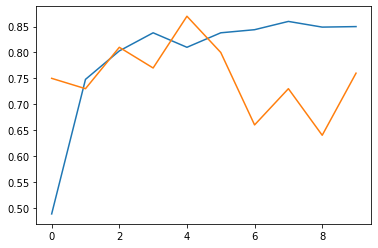

In [ ]:
# Grafik Accuracy vs Val_Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [ ]:
# Simpan model
model.save('My_Model_10.h5', save_format='h5')

In [ ]:
modell = load_model('/content/My_Model_4.h5')

In [ ]:
from google.colab import files
unggahan = files.upload()

for i in unggahan.keys():
  path = '/content/' + i
  save_path = '/content/Gaussian_{}'.format(i)
  gambar = cv2.imread(path)
  gambar = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)
  gaussian = cv2.addWeighted(gambar,4, cv2.GaussianBlur( gambar , (0,0) , 426/10) ,-4 ,128)
  cv2.imwrite(save_path, gaussian)
  
  gmbr = tf.keras.preprocessing.image.load_img(save_path, target_size=(426,426))

  x=tf.keras.preprocessing.image.img_to_array(gmbr)
  x = x / 255
  x=np.expand_dims(x,axis=0)
  gambar = np.vstack([x])

  kelas = modell.predict(gambar,batch_size=32)
  print(kelas)
  predicted = np.argmax(kelas)
  print(predicted)
  if predicted == 0:
    print("Terindikasi Diabetes")
  if predicted == 1:
    print("Terindikasi Diabetes")
  if predicted == 2:
    print("Tidak Terindikasi Diabetes")
  if predicted == 3:
    print("Terindikasi Diabetes")
  if predicted == 4:
    print("Terindikasi Diabetes")

Saving 10193_left.jpeg to 10193_left (2).jpeg
[[0.34198067 0.5326773  0.01671738 0.01812965 0.09049496]]
1
Terindikasi Diabetes
